<a href="https://colab.research.google.com/github/GoldenWanGila/Collage-Project/blob/master/%E9%80%86%E6%99%AE%E5%A4%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[06:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.2718605144427154


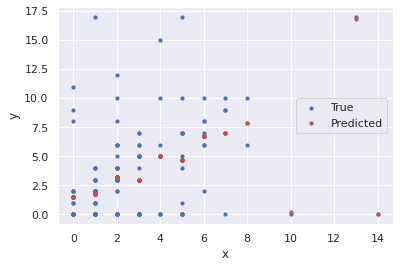

3.3540575346535255
[06:54:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.054389675230597345


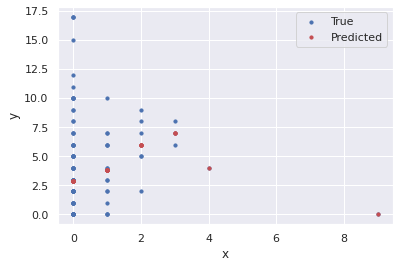

3.8222520260422996
[06:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  -0.11841380040079885


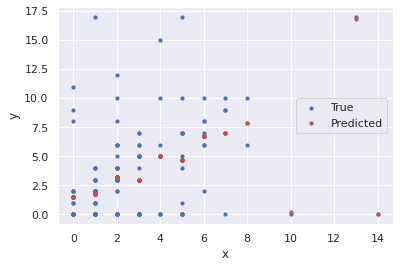

3.3540575346535255


In [9]:
import matplotlib.pyplot as plt
from numpy.core import numeric
import seaborn as sns; sns.set()
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
import os
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sympy import *
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from math import sqrt

rail = pd.read_csv("/content/drive/MyDrive/railway_original.csv")
rail = rail.dropna()
rail=rail.drop([22157])


rail = rail[rail["date"]>='2021/01/29']
rail = rail[rail["date"]!="2021/04/02"]
rail = rail[rail["date"]!="2021/04/03"]
rail = rail[rail["date"]!="2020/12/23"]


label_map = {'Keelung':1,'Xizhi':2,'Taipei':3,'Banqiao':4,'Taoyuan':5,'Zhongli':6,'Hsinchu':7,'Zhunan':8,'Miaoli':9,'Fengyuan':10,'Taichung':11,'Changhua':12,'Yuanlin':13,
'Douliu':14,'Chiayi':15,'Tainan':16,'Xinzuoying':17,'Kaohsiung':18,'Tanzi':0,'Taiyuan':0,'Xinwuri':0}

#普太資格(高雄、台南、台中、新竹、桃園、板橋、台北)
#實驗站、賺錢站、爭議站(嘉義、豐原、苗栗、中壢、桃園)
#台中<<新竹、台中<<桃園
list1 = [111,127,143]
railh = rail[rail["num"].isin(list1)]

list11 = [111,127]
railh1 = rail[rail["num"].isin(list11)]
#127(高雄、台南、台中、新竹、板橋、台北)(對照組)
#111(高雄、台南、嘉義、台中、桃園、板橋、台北)

railkh = railh[railh["Station"]=='Kaohsiung']
railtn = railh[railh["Station"]=='Tainan']
railcy = railh[railh["Station"]=='Chiayi']
railtc = railh[railh["Station"]=='Taichung']
railhc = railh[railh["Station"]=='Hsinchu']
railty = railh[railh["Station"]=='Taoyuan']
railbq = railh[railh["Station"]=='Banqiao']
railtp = railh[railh["Station"]=='Taipei']

railkh1 = railh[railh["Station"]=='Kaohsiung']
railtn1 = railh[railh["Station"]=='Tainan']
railtc1 = railh[railh["Station"]=='Taichung']
railbq1 = railh[railh["Station"]=='Banqiao']
railtp1 = railh[railh["Station"]=='Taipei']

#143超強自強號加入比較

list2 = [271,273,283,143]
rail = rail[rail["num"].isin(list2)]
#285服務海線性質可不做實驗

rail1 = rail[rail["Station"]=='Yuanlin']
rail2 = rail[rail["Station"]=='Changhua']
rail3 = rail[rail["Station"]=='Taichung']
rail4 = rail[rail["Station"]=='Fengyuan']
rail5 = rail[rail["Station"]=='Hsinchu']
rail6 = rail[rail["Station"]=='Zhongli']
rail7 = rail[rail["Station"]=='Taoyuan']
rail8 = rail[rail["Station"]=='Banqiao']
rail9 = rail[rail["Station"]=='Taipei']


#283(斗六、員林、彰化、台中、豐原、苗栗、板橋、台北)
railj = rail[rail["num"]==283]

rail10 = railj[railj["Station"]=='Douliu']
rail11 = railj[railj["Station"]=='Yuanlin']
rail12 = railj[railj["Station"]=='Changhua']
rail13 = railj[railj["Station"]=='Taichung']
rail14 = railj[railj["Station"]=='Fengyuan']
rail15 = railj[railj["Station"]=='Miaoli']
rail16 = railj[railj["Station"]=='Banqiao']
rail17 = railj[railj["Station"]=='Taipei']

#273(彰化、台中、豐原、板橋、台北)
railk = rail[rail["num"]==273]

rail20 = railk[railk["Station"]=='Changhua']
rail21 = railk[railk["Station"]=='Taichung']
rail22 = railk[railk["Station"]=='Fengyuan']
rail23 = railk[railk["Station"]=='Banqiao']
rail24 = railk[railk["Station"]=='Taipei']

#271(彰化、台中、豐原、苗栗、新竹、中壢、桃園、板橋、台北)
raill = rail[rail["num"]==271]

rail30 = raill[raill["Station"]=='Changhua']
rail31 = raill[raill["Station"]=='Taichung']
rail32 = raill[raill["Station"]=='Fengyuan']
rail33 = raill[raill["Station"]=='Miaoli']
rail34 = raill[raill["Station"]=='Hsinchu']
rail35 = raill[raill["Station"]=='Zhongli']
rail36 = raill[raill["Station"]=='Taoyuan']
rail37 = raill[raill["Station"]=='Banqiao']
rail38 = raill[raill["Station"]=='Taipei']

#143(彰化、台中、板橋、台北)
raill = rail[rail["num"]==143]

rail40 = raill[raill["Station"]=='Changhua']
rail41 = raill[raill["Station"]=='Taichung']

rail47 = raill[raill["Station"]=='Banqiao']
rail48 = raill[raill["Station"]=='Taipei']


#普太資格(高雄、台南、台中、新竹、桃園、板橋、台北)
#實驗站、賺錢站、爭議站(嘉義、豐原、苗栗、新竹、中壢、桃園)
#做:111,127,143      高雄<<台中、台南<<台北、台南<<台中


ykc= railkh["delay"].to_numpy()
xkc= railtc["delay"].to_numpy()
xkc=xkc.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xnb1,ynb1)
predicted=xgbrModel.predict(xnb1)
print("xg Score: ",xgbrModel.score(xnb1,ynb1))
plt.scatter(xnb1, ynb1, s=10, label='True')
plt.scatter(xnb1, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ynb1,predicted)
print(sqrt(v))

ynb= railtn["delay"].to_numpy()
xnb= railtp["delay"].to_numpy()
xnb=xnb.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xnb,ynb)
predicted=xgbrModel.predict(xnb)
print("xg Score: ",xgbrModel.score(xnb,ynb))
plt.scatter(xnb, ynb, s=10, label='True')
plt.scatter(xnb, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ynb,predicted)
print(sqrt(v))


ynb1= railtn["delay"].to_numpy()
xnb1= railtc["delay"].to_numpy()
xnb1=xnb1.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(xnb1,ynb1)
predicted=xgbrModel.predict(xnb1)
print("xg Score: ",xgbrModel.score(xnb,ynb))
plt.scatter(xnb1, ynb1, s=10, label='True')
plt.scatter(xnb1, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(ynb1,predicted)
print(sqrt(v))




[06:54:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.78584188427967


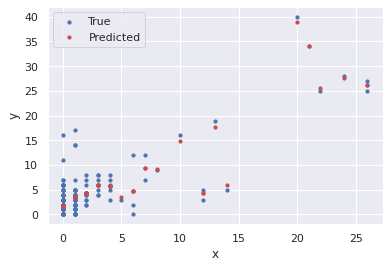

2.6495512687335876
[06:54:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.7143193479389197


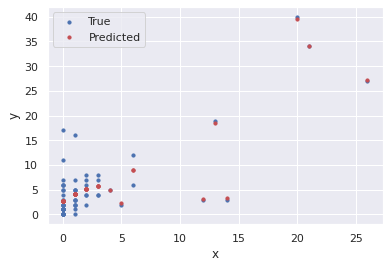

3.1995991046089123
[06:54:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.714606086978817


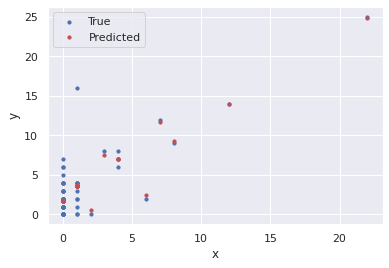

2.3023079578439454
[06:54:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.9083258179095384


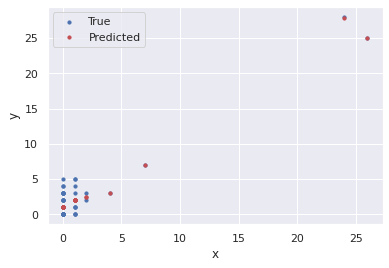

1.400762207151006
Empty DataFrame
Columns: [Station, direction, id, date, time, num, dest, delay, type]
Index: []
[06:54:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xg Score:  0.15102628916879868


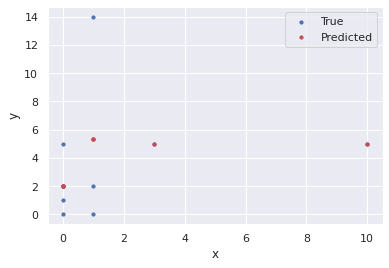

3.781044570501712


In [10]:
#做:271,273,283,143  台中<>板橋(分開+全部)

y38= rail3["delay"].to_numpy()
x38= rail8["delay"].to_numpy()
x38=x38.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x38,y38)
predicted=xgbrModel.predict(x38)
print("xg Score: ",xgbrModel.score(x38,y38))
plt.scatter(x38, y38, s=10, label='True')
plt.scatter(x38, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y38,predicted)
print(sqrt(v))

y381= rail13["delay"].to_numpy()
x381= rail16["delay"].to_numpy()
x381=x381.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x381,y381)
predicted=xgbrModel.predict(x381)
print("xg Score: ",xgbrModel.score(x38,y38))
plt.scatter(x381, y381, s=10, label='True')
plt.scatter(x381, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y381,predicted)
print(sqrt(v))

y382= rail21["delay"].to_numpy()
x382= rail23["delay"].to_numpy()
x382=x382.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x382,y382)
predicted=xgbrModel.predict(x382)
print("xg Score: ",xgbrModel.score(x382,y382))
plt.scatter(x382, y382, s=10, label='True')
plt.scatter(x382, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y382,predicted)
print(sqrt(v))

y383= rail31["delay"].to_numpy()
x383= rail37["delay"].to_numpy()
x383=x383.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x383,y383)
predicted=xgbrModel.predict(x383)
print("xg Score: ",xgbrModel.score(x383,y383))
plt.scatter(x383, y383, s=10, label='True')
plt.scatter(x383, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y383,predicted)
print(sqrt(v))

y384= rail41["delay"].to_numpy()
x384= rail47["delay"].to_numpy()
x384=x384.reshape(-1,1)
xgbrModel=xgb.XGBRegressor()
xgbrModel.fit(x384,y384)
predicted=xgbrModel.predict(x384)
print("xg Score: ",xgbrModel.score(x384,y384))
plt.scatter(x384, y384, s=10, label='True')
plt.scatter(x384, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
v = mean_squared_error(y384,predicted)
print(sqrt(v))

